<a href="https://colab.research.google.com/github/rutujaaa0509/Deep_Learning.Assignment/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2 - `Gradient Descent`

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
from google.colab import files
upload = files.upload()

Saving insurance_data (1).csv to insurance_data (1).csv


In [ ]:
df = pd.read_csv(list(upload.keys())[0])
df

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [ ]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[['age', 'affordibility']], df.bought_insurance, train_size=0.8)

In [ ]:
x_train

,age,affordibility
1,25,0
17,58,1
19,18,1
25,54,1
26,23,1
13,29,0
20,21,1
9,61,1
5,56,1
7,60,0


In [ ]:
x_test

,age,affordibility
8,62,1
10,18,1
2,47,1
22,40,1
16,25,0
24,50,1


In [ ]:
y_train

,bought_insurance
1,0
17,1
19,0
25,1
26,0
13,0
20,0
9,1
5,1
7,1


In [ ]:
y_test

,bought_insurance
8,1
10,0
2,1
22,1
16,1
24,1


In [ ]:
x_train_scaled = x_train.copy()
x_train_scaled['age'] = x_train_scaled['age'] / 100
x_test_scaled = x_test.copy()
x_test_scaled['age'] = x_test_scaled['age'] / 100

In [ ]:
x_train_scaled['intercept'] = 1
x_test_scaled['intercept'] = 1

In [ ]:
X_train = x_train_scaled[['intercept', 'age', 'affordibility']].values
y_train = y_train.values
X_test = x_test_scaled[['intercept', 'age', 'affordibility']].values
y_test = y_test.values

In [ ]:
weights = np.zeros(X_train.shape[1])

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def cost_function(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

In [ ]:
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []
    for epoch in range(epochs):
        # Calculate the predictions
        predictions = sigmoid(np.dot(X, weights))

        # Compute the gradient
        gradients = (1/m) * np.dot(X.T, (predictions - y))

        # Update the weights
        weights -= learning_rate * gradients

        # Record the cost every 100 epochs (for visualization)
        if epoch % 100 == 0:
            cost_history.append(cost_function(X, y, weights))

    return weights, cost_history

In [ ]:
# Set hyperparameters for gradient descent
learning_rate = 0.01
epochs = 5000
weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

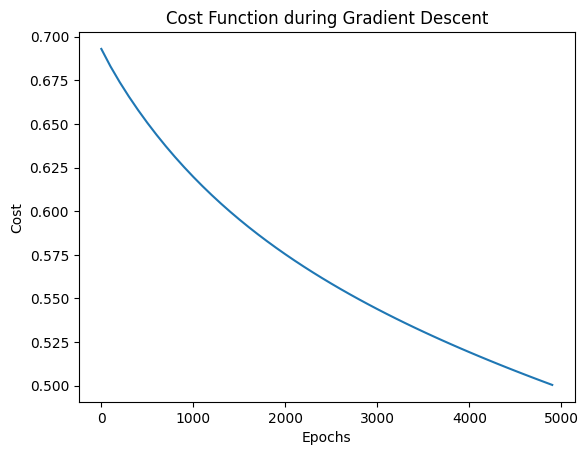

In [ ]:
plt.plot(range(0, epochs, 100), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function during Gradient Descent')
plt.show()

In [ ]:
def predict(X, weights):
    predictions = sigmoid(np.dot(X, weights))
    return [1 if i >= 0.5 else 0 for i in predictions]

In [ ]:
predictions = predict(X_test, weights)

In [ ]:
# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 83.33%
